In [1]:
# written in python 3
# Yicheng Li
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
import random

/home/yicheng/.local/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
print(pd.__version__)

0.22.0


In [2]:
df = pd.read_pickle('BTC-USD-60.pkl')

In [10]:
df.head(20)

,time,low,high,open,close,volume,date
0,1451624340,436.12,436.13,436.12,436.12,6.139053,2016-01-01
1,1451624280,436.02,436.36,436.02,436.13,0.312749,2016-01-01
2,1451624220,436.03,437.12,437.02,436.03,23.060550,2016-01-01
3,1451624160,437.02,437.07,437.02,437.07,1.017000,2016-01-01
4,1451624100,437.02,437.11,437.11,437.02,1.308700,2016-01-01
5,1451624040,437.08,437.12,437.08,437.12,5.810200,2016-01-01
6,1451623980,436.78,437.15,436.78,437.15,25.048400,2016-01-01
7,1451623920,436.36,437.00,436.37,437.00,43.187900,2016-01-01
8,1451623860,435.99,436.45,435.99,436.36,14.718931,2016-01-01
9,1451623800,435.99,435.99,435.99,435.99,2.450000,2016-01-01


In [22]:
df['date'] = pd.to_datetime(df['time'],unit='s').dt.date

In [31]:
group = df.groupby('date')
Daily_Mean_Price = group['close'].mean()

Daily_Mean_Price.head()

date
2016-01-01    433.300405
2016-01-02    435.083883
2016-01-03    431.338427
2016-01-04    433.626442
2016-01-05    433.373114
Name: close, dtype: float64

In [32]:
Daily_Mean_Price=Daily_Mean_Price.reset_index()
Daily_Mean_Price=Daily_Mean_Price.set_index('date')

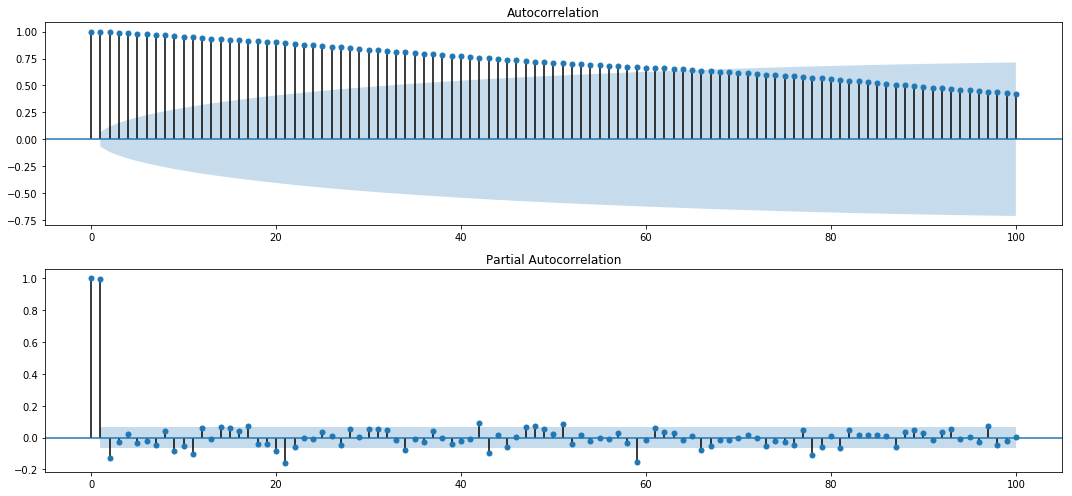

In [33]:
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(Daily_Mean_Price.close.values.squeeze(), lags=100, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(Daily_Mean_Price.close.values.squeeze(), lags=100, ax=ax)
plt.tight_layout()
plt.show()

In [11]:
from datetime import date
train_start_date = date(2016,1,1)
test_end_date = date(2018,4,3)

In [25]:
total_days = (test_end_date - train_start_date).days + 1
print(total_days)

824


In [26]:
num_days_train, num_days_validate = int(total_days * 0.7), int(total_days * 0.2)
num_days_test = total_days - num_days_train - num_days_validate
print(num_days_train, num_days_validate, num_days_test)

576 164 84


In [34]:
print(Daily_Mean_Price.values)

[[  433.3004053 ]
 [  435.08388335]
 [  431.33842655]
 [  433.62644167]
 [  433.37311355]
 [  431.9278979 ]
 [  449.83721501]
 [  456.37065609]
 [  452.04249818]
 [  446.85698282]
 [  448.99696157]
 [  447.10680977]
 [  431.26072857]
 [  431.93451613]
 [  401.8129187 ]
 [  371.18372093]
 [  384.30589591]
 [  380.48628973]
 [  380.97798313]
 [  390.90741221]
 [  413.29969186]
 [  394.07449713]
 [  390.03548918]
 [  399.30593043]
 [  395.73070866]
 [  393.17052786]
 [  394.32688873]
 [  384.31506503]
 [  376.85006494]
 [  379.18165385]
 [  379.45667462]
 [  373.1257578 ]
 [  372.87097561]
 [  371.05449128]
 [  377.43252915]
 [  385.95252899]
 [  375.84767976]
 [  376.53758002]
 [  376.02121439]
 [  372.0281107 ]
 [  376.16366084]
 [  375.43981712]
 [  380.0273822 ]
 [  388.4213263 ]
 [  399.13587739]
 [  402.31073541]
 [  403.21837795]
 [  414.26173035]
 [  419.72223287]
 [  419.56695385]
 [  431.2613613 ]
 [  437.92836948]
 [  436.19510938]
 [  426.89643064]
 [  421.15904691]
 [  422.91

In [66]:
price = np.array(Daily_Mean_Price.values).T
price = price[0]
print(np.shape(price))


(824,)


In [105]:
window_size = 4

In [16]:
def RMSE(y, y_pred):
    if len(y) != len(y_pred):
        raise ValueError('Length of prediction array is not equal to length of y array.')
    return np.sqrt(sum((y_pred-y)**2)/len(y))

In [17]:
def SMAPE(y, y_pred):
    if len(y) != len(y_pred):
        raise ValueError('Length of prediction array is not equal to length of y array.')
    return np.mean(np.abs(y-y_pred)*2/(np.abs(y)+np.abs(y_pred)))

In [106]:
# fixed-window linear regression
y = price[window_size:num_days_train]
W = np.random.rand(window_size)/window_size # initialize as weighted average
W_old = np.ones(window_size)
b = 1
learning_rate = 1e-10
error_list = []

timestep_random_perm = [x for x in range(num_days_train - window_size)]
timestep_random_perm = random.sample(timestep_random_perm, len(timestep_random_perm))
iteration = 0
batch_len = 0
gradient = 0
while np.abs(W_old.dot(W_old.T) - W.dot(W.T))/(W_old.dot(W_old.T)) > 0.00005:
    for timestep in timestep_random_perm:
        iteration += 1
#         print('iteration ',iteration)
        X = price[timestep:timestep+window_size]
        if batch_len == 5:
            batch_len = 1
            W_old = W
            W = W - learning_rate * gradient * X
            b = b - learning_rate * gradient
            gradient = W.dot(X.T) + b - price[timestep+window_size]
#             print(gradient, W, b)
        else:
            batch_len += 1
            gradient += W.dot(X.T) + b - price[timestep+window_size]

        if iteration % 20 == 0:
            y_pred = []
            for t in range(num_days_train - window_size):
                X = price[t:t+window_size]
                y_pred.append(W.dot(X.T) + b)
            error = RMSE(y, y_pred)
            error_list.append(error)
            print('iteration ',iteration)
            print('RMSE:',error)

    


iteration  20
RMSE: 778.0724529413939
iteration  40
RMSE: 767.373616610793
iteration  60
RMSE: 759.6406756467302
iteration  80
RMSE: 753.3048412408252
iteration  100
RMSE: 749.8811211396995
iteration  120
RMSE: 740.6819773470883
iteration  140
RMSE: 731.4911247347522
iteration  160
RMSE: 726.1839533319497
iteration  180
RMSE: 723.3628225851289
iteration  200
RMSE: 719.1216918788031
iteration  220
RMSE: 710.9195601322734
iteration  240
RMSE: 704.4948152492834
iteration  260
RMSE: 701.0981123169244
iteration  280
RMSE: 694.6404527010818
iteration  300
RMSE: 688.1689245819498
iteration  320
RMSE: 682.548231921228
iteration  340
RMSE: 678.0049536835129
iteration  360
RMSE: 675.4327859687284
iteration  380
RMSE: 667.2390987227001
iteration  400
RMSE: 660.6679546183863
iteration  420
RMSE: 654.8079491600811
iteration  440
RMSE: 648.3801548853743
iteration  460
RMSE: 641.7719352853301
iteration  480
RMSE: 636.4263472370487
iteration  500
RMSE: 634.4319086875134
iteration  520
RMSE: 632.144393

iteration  5040
RMSE: 145.3163232967689
iteration  5060
RMSE: 144.82267092428538
iteration  5080
RMSE: 144.38422731162927
iteration  5100
RMSE: 143.71450829806554
iteration  5120
RMSE: 143.03307446515302
iteration  5140
RMSE: 142.65711106933514
iteration  5160
RMSE: 142.17672244388663
iteration  5180
RMSE: 141.3979586688904
iteration  5200
RMSE: 140.801952288802
iteration  5220
RMSE: 140.20708735676146
iteration  5240
RMSE: 139.44990346022024
iteration  5260
RMSE: 138.1405089766023
iteration  5280
RMSE: 137.4807895533936
iteration  5300
RMSE: 137.1198097489883
iteration  5320
RMSE: 136.26278093359704
iteration  5340
RMSE: 135.6161769197987
iteration  5360
RMSE: 135.2036889285904
iteration  5380
RMSE: 133.99389377230975
iteration  5400
RMSE: 133.01736440410278
iteration  5420
RMSE: 131.86763028263988
iteration  5440
RMSE: 130.92034617206994
iteration  5460
RMSE: 129.55148561935795
iteration  5480
RMSE: 128.67655570358372
iteration  5500
RMSE: 128.34885212441543
iteration  5520
RMSE: 128

Training RMSE: 77.8644729276247
Training SMAPE: 0.040341232071264124


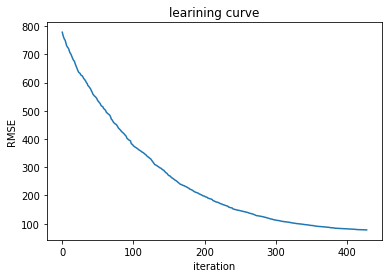

In [107]:
plt.figure()
plt.plot([x for x in range(len(error_list))], error_list)
plt.title('learining curve')
plt.ylabel('RMSE')
plt.xlabel('iteration')
print('Training RMSE:',error_list[-1])
y_pred = []
for t in range(num_days_train - window_size):
    X = price[t:t+window_size]
    y_pred.append(W.dot(X.T) + b)
print('Training SMAPE:',SMAPE(y, y_pred))

In [69]:
print(W.dot(W.T))

0.054349550164319804


In [100]:
print(sum(W)) # should be close to 1 because it's essentially weighted average
print(W)

0.9120485397870371
[0.91204854]


In [108]:
# validate
y = price[num_days_train:num_days_train+num_days_validate]
y_pred = []

for timestep in range(num_days_train-window_size,num_days_train+num_days_validate-window_size):
    X = price[timestep:timestep+window_size]
    y_pred.append(W.dot(X.T) + b)

print('Validation RMSE:', RMSE(y, y_pred))
print('Validation SMAPE:', SMAPE(y, y_pred))

    

Validation RMSE: 870.0443316949797
Validation SMAPE: 0.06961605192321875


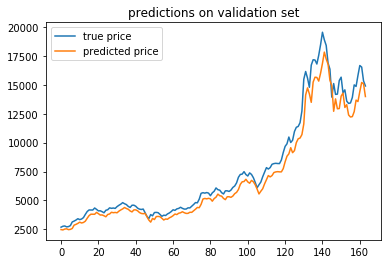

In [99]:
plt.figure()
plt.plot([x for x in range(len(y))],y)
plt.plot([x for x in range(len(y))],y_pred)
plt.title('predictions on validation set')
plt.legend(['true price','predicted price'])


Text(0.5,1,'true price, traning and validation sets')

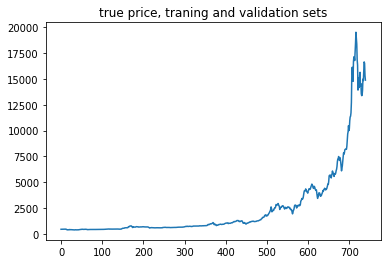

In [311]:
plt.figure()
plt.plot([x for x in range(len(price))], price)
plt.title('true price, traning and validation sets')